In [1]:
import json
import glob
import pandas as pd
import os
import seaborn as sns
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
import zipfile
import json
from PIL import Image, ImageDraw
import cv2
import random

# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_bound(dir,name): # json 파일내 정보를 |반환하는 함수 (파일명, 사이즈 등)
    path = f'C:/Users/yu/project/data/data_star/selectstar-reusable-trash-json/{name[54:][:-4]}.json'
    with open(path, 'rt', encoding='UTF8') as f:
        data = json.load(f)  
        total_data = {}

    if len(data["shapes"]) == 1:
        total_data["name"]= data["imagePath"]
        total_data["size_x"]= data["imageWidth"] # 해상도 가로
        total_data["size_y"]= data["imageHeight"] # 해상도 세로
        total_data["shapes"] = data["shapes"][0]["label"]  
        total_data["x1"] = data["shapes"][0]["points"][0][0]
        total_data["y1"] = data["shapes"][0]["points"][0][1]
        total_data["x2"] = data["shapes"][0]["points"][1][0]
        total_data["y2"] = data["shapes"][0]["points"][1][1]
        return total_data

    elif len(data["shapes"]) > 1:
        return ""

In [3]:
dir = "C:/Users/yu/project/data/reusable-trash-images.zip" # 이미지 리사이즈 후 저장하기

empty_df = pd.DataFrame()

with zipfile.ZipFile(dir, 'r') as obj:
    zip_namelist = obj.namelist()      
    for index_file,name in enumerate(zip_namelist) :
        if name.endswith('.jpg') :   
            
            bound= get_bound(dir,name)
            if bound != "":
                img = Image.open(obj.open(name)).convert("RGB")
                img = img.resize((256,256))
                print(name)
                img.save(f'C:/Users/yu/project/data/data_star/{name[54:]}')
                
                empty_df = pd.concat([empty_df, pd.DataFrame(get_bound(dir,name),index = [0])], axis = 0, join = 'outer')

reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg
reusable-trash-images/selectstar-reusable-trash-image/3403658.jpg
reusable-trash-images/selectstar-reusable-trash-image/3403788.jpg
reusable-trash-images/selectstar-reusable-trash-image/3403841.jpg
reusable-trash-images/selectstar-reusable-trash-image/3403871.jpg
reusable-trash-images/selectstar-reusable-trash-image/3403971.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404044.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404065.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404070.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404106.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404111.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404138.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404188.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404200.jpg
reusable-trash-images/selectstar-reusable-trash-image/3404245.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3405677.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405685.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405694.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405699.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405708.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405711.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405712.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405720.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405728.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405738.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405745.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405752.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405761.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405764.jpg
reusable-trash-images/selectstar-reusable-trash-image/3405769.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3406660.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406667.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406681.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406687.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406688.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406715.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406717.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406718.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406719.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406720.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406731.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406740.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406743.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406756.jpg
reusable-trash-images/selectstar-reusable-trash-image/3406773.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3407587.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407588.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407602.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407605.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407609.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407612.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407629.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407631.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407642.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407645.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407652.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407672.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407676.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407679.jpg
reusable-trash-images/selectstar-reusable-trash-image/3407684.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3408565.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408575.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408581.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408584.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408590.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408596.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408600.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408602.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408605.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408626.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408627.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408637.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408647.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408661.jpg
reusable-trash-images/selectstar-reusable-trash-image/3408662.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3409225.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409226.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409249.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409253.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409259.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409267.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409275.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409276.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409280.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409285.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409292.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409295.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409298.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409302.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409303.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3409910.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409927.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409942.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409955.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409958.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409965.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409970.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409971.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409973.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409974.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409982.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409992.jpg
reusable-trash-images/selectstar-reusable-trash-image/3409999.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410013.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410020.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3410926.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410927.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410932.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410940.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410963.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410976.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410977.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410982.jpg
reusable-trash-images/selectstar-reusable-trash-image/3410998.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411021.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411034.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411042.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411044.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411055.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411073.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3411774.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411775.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411785.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411786.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411795.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411824.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411838.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411839.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411847.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411850.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411857.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411866.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411872.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411883.jpg
reusable-trash-images/selectstar-reusable-trash-image/3411889.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3412751.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412755.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412761.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412764.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412770.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412776.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412778.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412808.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412810.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412818.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412823.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412827.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412828.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412830.jpg
reusable-trash-images/selectstar-reusable-trash-image/3412833.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3413564.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413574.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413580.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413583.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413589.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413603.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413610.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413617.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413622.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413623.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413624.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413629.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413638.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413641.jpg
reusable-trash-images/selectstar-reusable-trash-image/3413645.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3414387.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414393.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414396.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414398.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414419.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414430.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414436.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414445.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414447.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414456.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414459.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414461.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414470.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414477.jpg
reusable-trash-images/selectstar-reusable-trash-image/3414486.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3415051.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415052.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415053.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415056.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415062.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415069.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415070.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415071.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415076.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415078.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415087.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415095.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415096.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415103.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415112.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3415866.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415868.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415898.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415920.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415924.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415936.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415958.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415980.jpg
reusable-trash-images/selectstar-reusable-trash-image/3415983.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416000.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416001.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416012.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416013.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416031.jpg
reusable-trash-images/selectstar-reusable-trash-image/3416038.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3417081.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417085.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417089.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417095.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417106.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417113.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417116.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417121.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417125.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417154.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417167.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417183.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417184.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417211.jpg
reusable-trash-images/selectstar-reusable-trash-image/3417213.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3418311.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418333.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418335.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418339.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418359.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418372.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418382.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418398.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418401.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418409.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418414.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418419.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418429.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418433.jpg
reusable-trash-images/selectstar-reusable-trash-image/3418435.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3419406.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419435.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419436.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419441.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419456.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419473.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419475.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419478.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419503.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419511.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419514.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419515.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419516.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419518.jpg
reusable-trash-images/selectstar-reusable-trash-image/3419538.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3420409.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420412.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420416.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420417.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420420.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420430.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420437.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420442.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420458.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420460.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420469.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420515.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420537.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420542.jpg
reusable-trash-images/selectstar-reusable-trash-image/3420547.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3421738.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421744.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421749.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421751.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421764.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421786.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421794.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421796.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421797.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421804.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421805.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421807.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421817.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421821.jpg
reusable-trash-images/selectstar-reusable-trash-image/3421829.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3422937.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422945.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422960.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422968.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422971.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422994.jpg
reusable-trash-images/selectstar-reusable-trash-image/3422997.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423003.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423012.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423014.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423025.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423027.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423037.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423048.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423051.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3423796.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423806.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423807.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423814.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423815.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423819.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423832.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423836.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423846.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423851.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423853.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423856.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423858.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423865.jpg
reusable-trash-images/selectstar-reusable-trash-image/3423877.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3424698.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424703.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424709.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424713.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424717.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424737.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424741.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424749.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424753.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424758.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424767.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424769.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424775.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424780.jpg
reusable-trash-images/selectstar-reusable-trash-image/3424812.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3425929.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425939.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425948.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425949.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425976.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425990.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425991.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425995.jpg
reusable-trash-images/selectstar-reusable-trash-image/3425998.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426012.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426027.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426033.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426040.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426042.jpg
reusable-trash-images/selectstar-reusable-trash-image/3426050.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3427174.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427184.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427195.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427209.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427211.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427216.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427219.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427228.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427235.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427254.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427257.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427267.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427272.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427280.jpg
reusable-trash-images/selectstar-reusable-trash-image/3427292.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3428597.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428616.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428618.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428619.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428628.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428630.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428661.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428669.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428681.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428691.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428693.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428708.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428717.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428728.jpg
reusable-trash-images/selectstar-reusable-trash-image/3428735.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3429628.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429649.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429655.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429657.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429684.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429706.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429714.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429746.jpg
reusable-trash-images/selectstar-reusable-trash-image/3429770.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430161.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430195.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430331.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430412.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430413.jpg
reusable-trash-images/selectstar-reusable-trash-image/3430619.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3448059.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448284.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448352.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448390.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448561.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448578.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448597.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448725.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448808.jpg
reusable-trash-images/selectstar-reusable-trash-image/3448872.jpg
reusable-trash-images/selectstar-reusable-trash-image/3449129.jpg
reusable-trash-images/selectstar-reusable-trash-image/3449520.jpg
reusable-trash-images/selectstar-reusable-trash-image/3450128.jpg
reusable-trash-images/selectstar-reusable-trash-image/3450254.jpg
reusable-trash-images/selectstar-reusable-trash-image/3450260.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3466288.jpg
reusable-trash-images/selectstar-reusable-trash-image/3467201.jpg
reusable-trash-images/selectstar-reusable-trash-image/3467583.jpg
reusable-trash-images/selectstar-reusable-trash-image/3468129.jpg
reusable-trash-images/selectstar-reusable-trash-image/3468170.jpg
reusable-trash-images/selectstar-reusable-trash-image/3468282.jpg
reusable-trash-images/selectstar-reusable-trash-image/3468354.jpg
reusable-trash-images/selectstar-reusable-trash-image/3468792.jpg
reusable-trash-images/selectstar-reusable-trash-image/3469100.jpg
reusable-trash-images/selectstar-reusable-trash-image/3469667.jpg
reusable-trash-images/selectstar-reusable-trash-image/3470572.jpg
reusable-trash-images/selectstar-reusable-trash-image/3473726.jpg
reusable-trash-images/selectstar-reusable-trash-image/3473874.jpg
reusable-trash-images/selectstar-reusable-trash-image/3476669.jpg
reusable-trash-images/selectstar-reusable-trash-image/3477014.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3505719.jpg
reusable-trash-images/selectstar-reusable-trash-image/3505749.jpg
reusable-trash-images/selectstar-reusable-trash-image/3505913.jpg
reusable-trash-images/selectstar-reusable-trash-image/3506005.jpg
reusable-trash-images/selectstar-reusable-trash-image/3506844.jpg
reusable-trash-images/selectstar-reusable-trash-image/3507251.jpg
reusable-trash-images/selectstar-reusable-trash-image/3507283.jpg
reusable-trash-images/selectstar-reusable-trash-image/3507434.jpg
reusable-trash-images/selectstar-reusable-trash-image/3507633.jpg
reusable-trash-images/selectstar-reusable-trash-image/3508093.jpg
reusable-trash-images/selectstar-reusable-trash-image/3508221.jpg
reusable-trash-images/selectstar-reusable-trash-image/3508415.jpg
reusable-trash-images/selectstar-reusable-trash-image/3508596.jpg
reusable-trash-images/selectstar-reusable-trash-image/3508703.jpg
reusable-trash-images/selectstar-reusable-trash-image/3509148.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3528966.jpg
reusable-trash-images/selectstar-reusable-trash-image/3529555.jpg
reusable-trash-images/selectstar-reusable-trash-image/3529645.jpg
reusable-trash-images/selectstar-reusable-trash-image/3529724.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530153.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530171.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530351.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530508.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530587.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530645.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530680.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530685.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530804.jpg
reusable-trash-images/selectstar-reusable-trash-image/3530895.jpg
reusable-trash-images/selectstar-reusable-trash-image/3531005.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3552163.jpg
reusable-trash-images/selectstar-reusable-trash-image/3552424.jpg
reusable-trash-images/selectstar-reusable-trash-image/3553820.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554203.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554216.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554218.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554326.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554623.jpg
reusable-trash-images/selectstar-reusable-trash-image/3554918.jpg
reusable-trash-images/selectstar-reusable-trash-image/3555301.jpg
reusable-trash-images/selectstar-reusable-trash-image/3555552.jpg
reusable-trash-images/selectstar-reusable-trash-image/3556026.jpg
reusable-trash-images/selectstar-reusable-trash-image/3556514.jpg
reusable-trash-images/selectstar-reusable-trash-image/3556957.jpg
reusable-trash-images/selectstar-reusable-trash-image/3557096.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3588547.jpg
reusable-trash-images/selectstar-reusable-trash-image/3588695.jpg
reusable-trash-images/selectstar-reusable-trash-image/3589159.jpg
reusable-trash-images/selectstar-reusable-trash-image/3589770.jpg
reusable-trash-images/selectstar-reusable-trash-image/3589852.jpg
reusable-trash-images/selectstar-reusable-trash-image/3589914.jpg
reusable-trash-images/selectstar-reusable-trash-image/3589982.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591378.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591468.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591483.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591509.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591615.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591631.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591696.jpg
reusable-trash-images/selectstar-reusable-trash-image/3591726.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3598798.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598918.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598931.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598958.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598969.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598984.jpg
reusable-trash-images/selectstar-reusable-trash-image/3598991.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599018.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599046.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599056.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599085.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599093.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599107.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599112.jpg
reusable-trash-images/selectstar-reusable-trash-image/3599117.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3603357.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603388.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603468.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603476.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603529.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603691.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603712.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603809.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603889.jpg
reusable-trash-images/selectstar-reusable-trash-image/3603998.jpg
reusable-trash-images/selectstar-reusable-trash-image/3604010.jpg
reusable-trash-images/selectstar-reusable-trash-image/3604016.jpg
reusable-trash-images/selectstar-reusable-trash-image/3604025.jpg
reusable-trash-images/selectstar-reusable-trash-image/3604174.jpg
reusable-trash-images/selectstar-reusable-trash-image/3604183.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3609811.jpg
reusable-trash-images/selectstar-reusable-trash-image/3609832.jpg
reusable-trash-images/selectstar-reusable-trash-image/3609911.jpg
reusable-trash-images/selectstar-reusable-trash-image/3609970.jpg
reusable-trash-images/selectstar-reusable-trash-image/3609997.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610112.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610153.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610207.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610237.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610458.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610520.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610537.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610567.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610613.jpg
reusable-trash-images/selectstar-reusable-trash-image/3610668.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3616024.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616095.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616102.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616155.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616166.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616171.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616213.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616298.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616357.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616523.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616525.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616563.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616572.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616576.jpg
reusable-trash-images/selectstar-reusable-trash-image/3616589.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3626099.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626119.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626132.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626140.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626193.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626239.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626243.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626248.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626336.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626402.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626523.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626545.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626789.jpg
reusable-trash-images/selectstar-reusable-trash-image/3626813.jpg
reusable-trash-images/selectstar-reusable-trash-image/3627098.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3639268.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639302.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639345.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639367.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639551.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639617.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639637.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639679.jpg
reusable-trash-images/selectstar-reusable-trash-image/3639815.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640059.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640137.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640332.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640759.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640821.jpg
reusable-trash-images/selectstar-reusable-trash-image/3640849.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3653814.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653825.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653854.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653856.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653936.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653940.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653952.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653977.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653994.jpg
reusable-trash-images/selectstar-reusable-trash-image/3653997.jpg
reusable-trash-images/selectstar-reusable-trash-image/3654031.jpg
reusable-trash-images/selectstar-reusable-trash-image/3654059.jpg
reusable-trash-images/selectstar-reusable-trash-image/3654091.jpg
reusable-trash-images/selectstar-reusable-trash-image/3654125.jpg
reusable-trash-images/selectstar-reusable-trash-image/3654157.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3662706.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662848.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662906.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662939.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662964.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662973.jpg
reusable-trash-images/selectstar-reusable-trash-image/3662991.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663041.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663235.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663484.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663505.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663574.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663579.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663633.jpg
reusable-trash-images/selectstar-reusable-trash-image/3663658.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3671491.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671497.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671535.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671575.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671592.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671631.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671639.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671668.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671670.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671707.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671762.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671780.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671804.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671811.jpg
reusable-trash-images/selectstar-reusable-trash-image/3671818.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3679224.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679227.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679333.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679397.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679423.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679429.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679433.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679439.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679471.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679493.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679495.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679515.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679519.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679520.jpg
reusable-trash-images/selectstar-reusable-trash-image/3679524.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3684174.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684337.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684378.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684460.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684517.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684525.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684552.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684561.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684575.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684587.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684617.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684622.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684683.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684732.jpg
reusable-trash-images/selectstar-reusable-trash-image/3684760.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3688130.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688168.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688274.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688364.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688375.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688404.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688426.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688443.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688471.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688562.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688628.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688648.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688691.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688712.jpg
reusable-trash-images/selectstar-reusable-trash-image/3688743.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3694451.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694458.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694494.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694516.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694603.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694695.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694704.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694736.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694749.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694774.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694784.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694792.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694800.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694817.jpg
reusable-trash-images/selectstar-reusable-trash-image/3694826.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3702434.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702439.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702462.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702568.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702632.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702635.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702677.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702809.jpg
reusable-trash-images/selectstar-reusable-trash-image/3702874.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703117.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703205.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703215.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703300.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703483.jpg
reusable-trash-images/selectstar-reusable-trash-image/3703576.jpg
reusable-t

reusable-trash-images/selectstar-reusable-trash-image/3709012.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709039.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709109.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709122.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709143.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709211.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709321.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709373.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709386.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709497.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709634.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709647.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709651.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709724.jpg
reusable-trash-images/selectstar-reusable-trash-image/3709842.jpg
reusable-t

OSError: image file is truncated (20 bytes not processed)

In [4]:
empty_df.to_csv('./data/star_df.csv', header=True, index=False,encoding='ms949') # csv파일로 만들어서 저장

In [80]:
df= pd.read_csv('./data/star_df.csv', encoding='cp949')

print('이미지 개수:', len(glob.glob('./data/data_star/*.jpg')))
print('라벨 개수:', len(df['shapes'].unique()))
print('라벨 이름:', df['shapes'].unique())

이미지 개수: 5875
라벨 개수: 7
라벨 이름: ['pack' 'can' 'glass' 'paper' 'plastic' 'pet' 'vinyl']


In [81]:
df

,name,size_x,size_y,shapes,x1,y1,x2,y2
0,3403540.jpg,2272,4032,pack,926.446624,1682.100000,1247.866464,2283.751008
1,3403658.jpg,2272,4032,can,998.923424,1701.000000,1295.133152,2223.902016
2,3403788.jpg,4032,2272,glass,1434.782922,972.086083,2672.409305,1184.842661
3,3403841.jpg,2268,4032,paper,859.949622,1663.200000,1515.149874,2419.200000
4,3403871.jpg,2268,4032,paper,861.333333,1683.333333,1493.333333,2444.666667
...,...,...,...,...,...,...,...,...
5870,3718233.jpg,4640,2610,paper,1069.376160,869.999130,3465.500000,1921.249710
5871,3718307.jpg,4128,2322,paper,744.973968,528.899355,3147.597936,1773.749097
5872,3718450.jpg,4640,2610,paper,1225.247680,681.498405,3335.000000,2076.846818
5873,3718566.jpg,2268,4032,vinyl,781.443299,1517.525773,2023.711340,2364.948454


In [94]:
df.rename(columns={'name' : 'file_name', 'shapes':'label'}, inplace=True)

df['object_x'] = abs(df['x2']-df['x1']) # 객체 너비 object_x열 추가
df['object_y'] = abs(df['y2']-df['y1']) # 객체 높이 object_y열 추가

In [95]:
df.info() # 결측치  확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  5875 non-null   object 
 1   size_x     5875 non-null   int64  
 2   size_y     5875 non-null   int64  
 3   label      5875 non-null   object 
 4   x1         5875 non-null   float64
 5   y1         5875 non-null   float64
 6   x2         5875 non-null   float64
 7   y2         5875 non-null   float64
 8   object_x   5875 non-null   float64
 9   object_y   5875 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 459.1+ KB


In [96]:
df.describe() # 기본 통계 확인

,size_x,size_y,x1,y1,x2,y2,object_x,object_y
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2416.232851,3944.749617,871.059317,1469.251467,1562.940575,2379.738100,692.921899,911.453644
std,527.960899,649.110235,284.236332,372.972386,380.776732,455.544620,392.976520,456.260364
min,1080.000000,1080.000000,0.000000,59.851008,531.645570,590.999760,40.795498,53.588018
25%,2268.000000,4032.000000,716.397981,1295.521390,1341.835320,2182.951008,395.403858,593.576000
50%,2268.000000,4032.000000,863.101008,1508.851008,1477.349118,2394.000000,617.399496,854.750520
75%,2268.000000,4032.000000,985.950630,1694.700000,1666.350630,2596.665790,897.749244,1143.269304
max,5664.000000,5664.000000,2677.163934,2875.471698,4602.090909,4610.848584,4059.090909,3830.769231


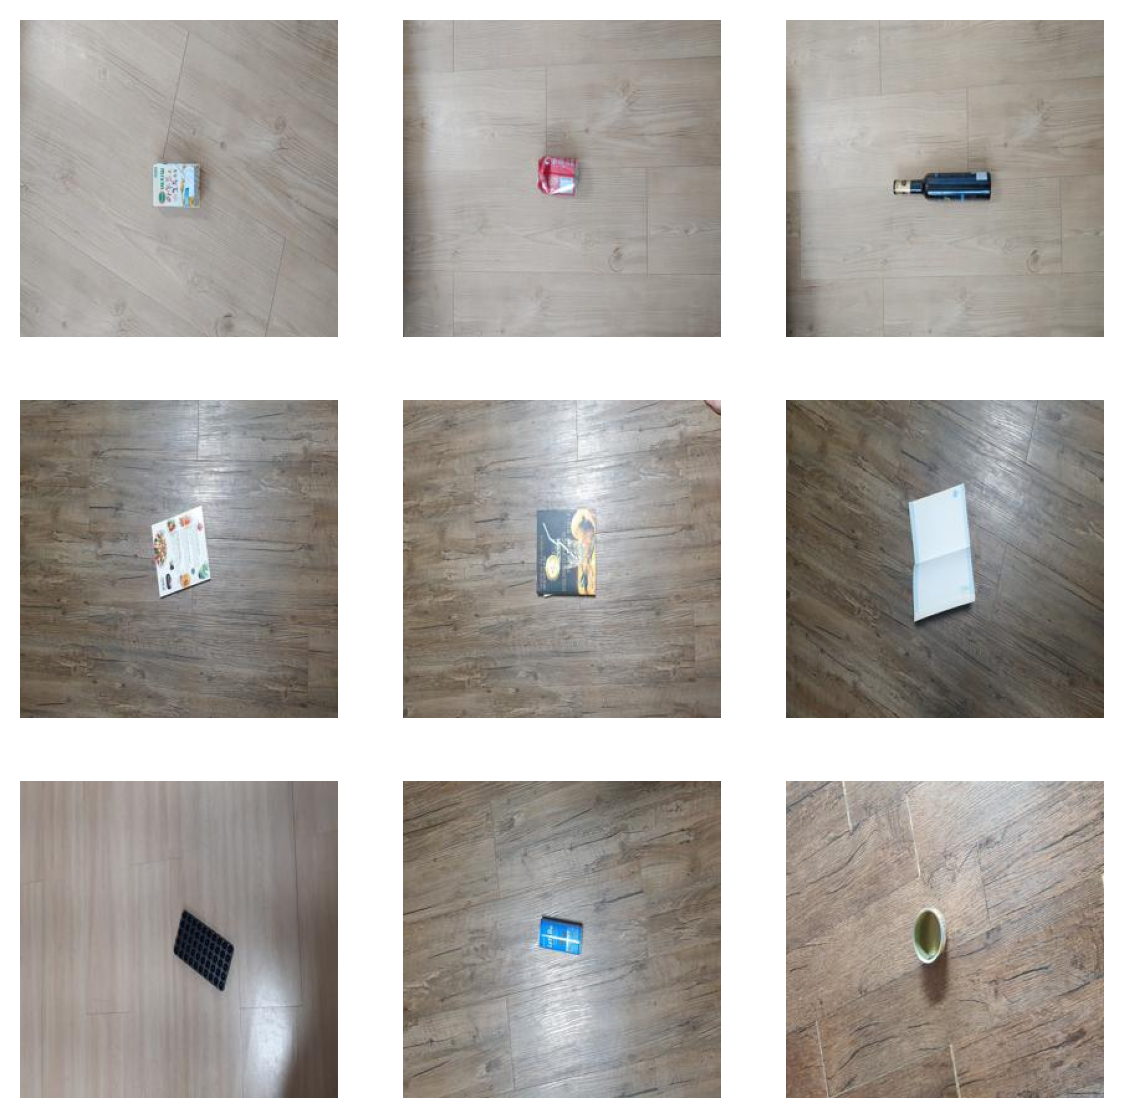

In [97]:
images = glob.glob('./data/data_star/*.jpg')

plt.figure(figsize=(7, 7))
for i in range(9):    
    ax = plt.subplot(3, 3, i + 1)
    img_test = Image.open(images[i])    
    plt.imshow(img_test)        
    plt.axis("off")
plt.show()

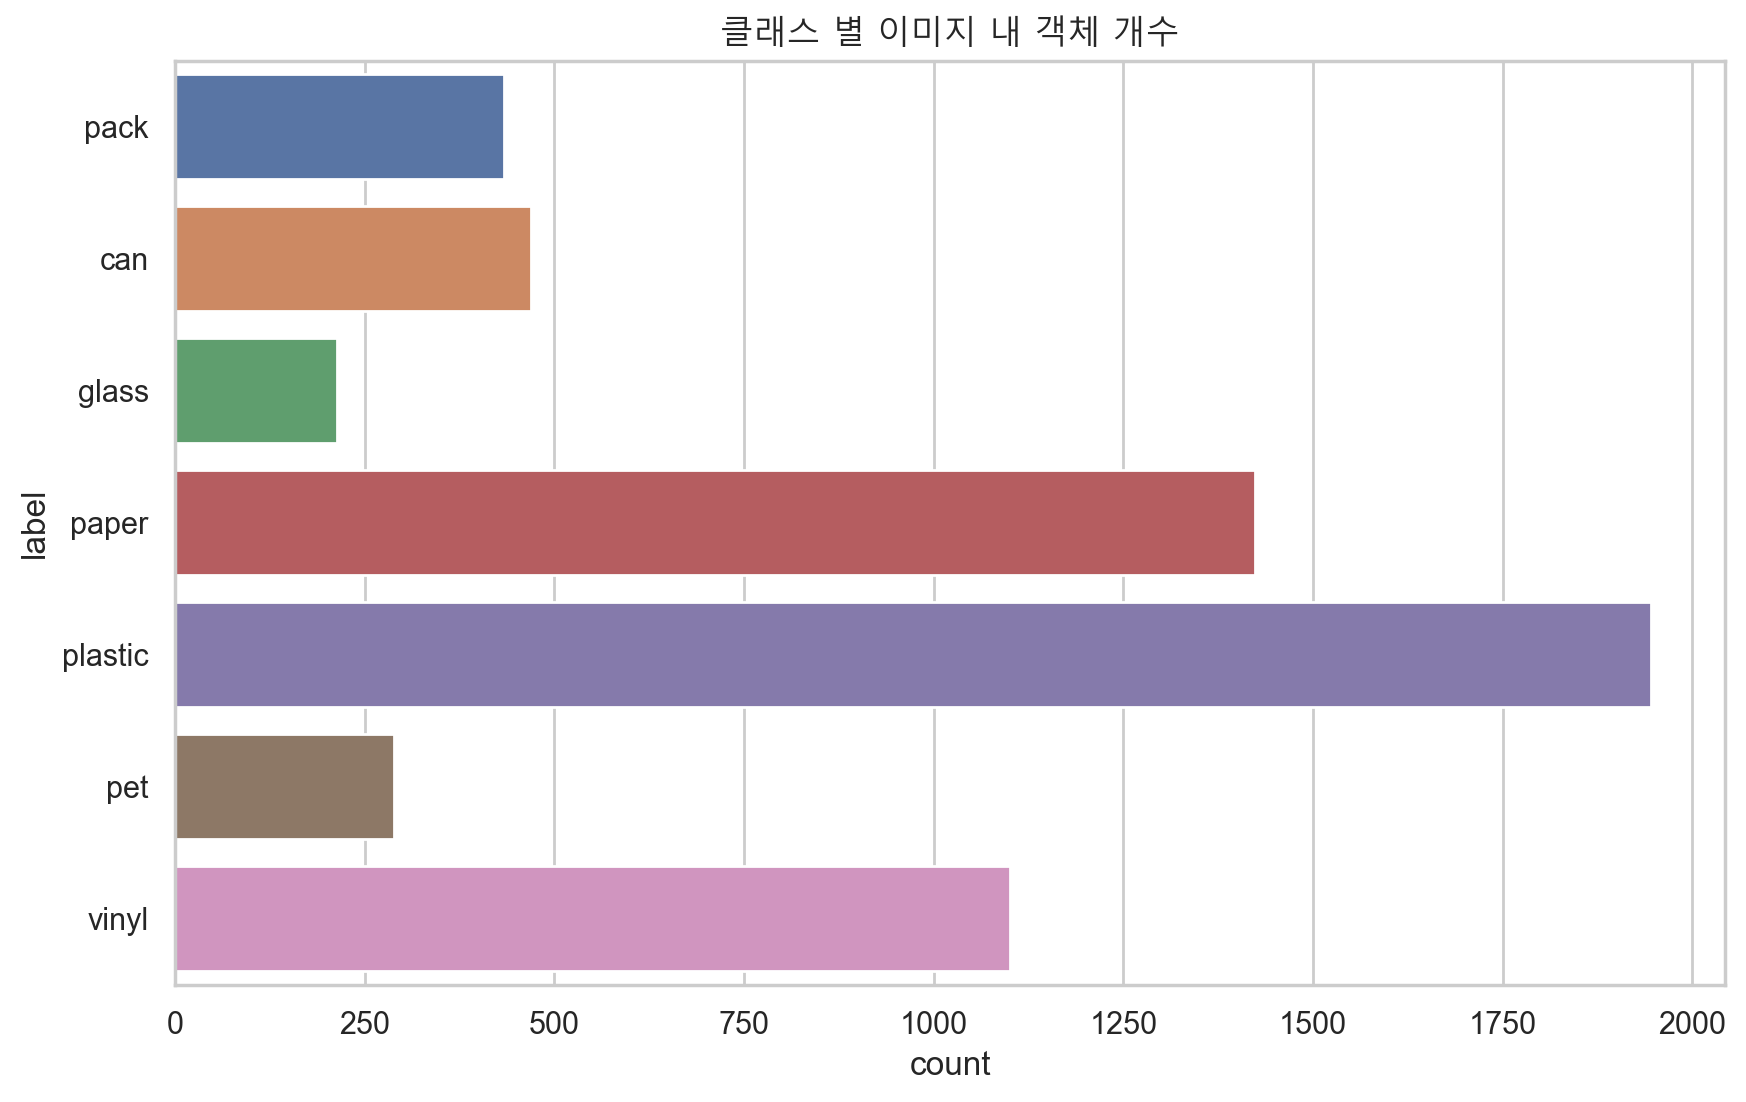

In [98]:
plt.figure(figsize=(10, 6))
plt.title('클래스 별 이미지 내 객체 개수', fontname ='malgun gothic')
sns.countplot(y='label', data=df);

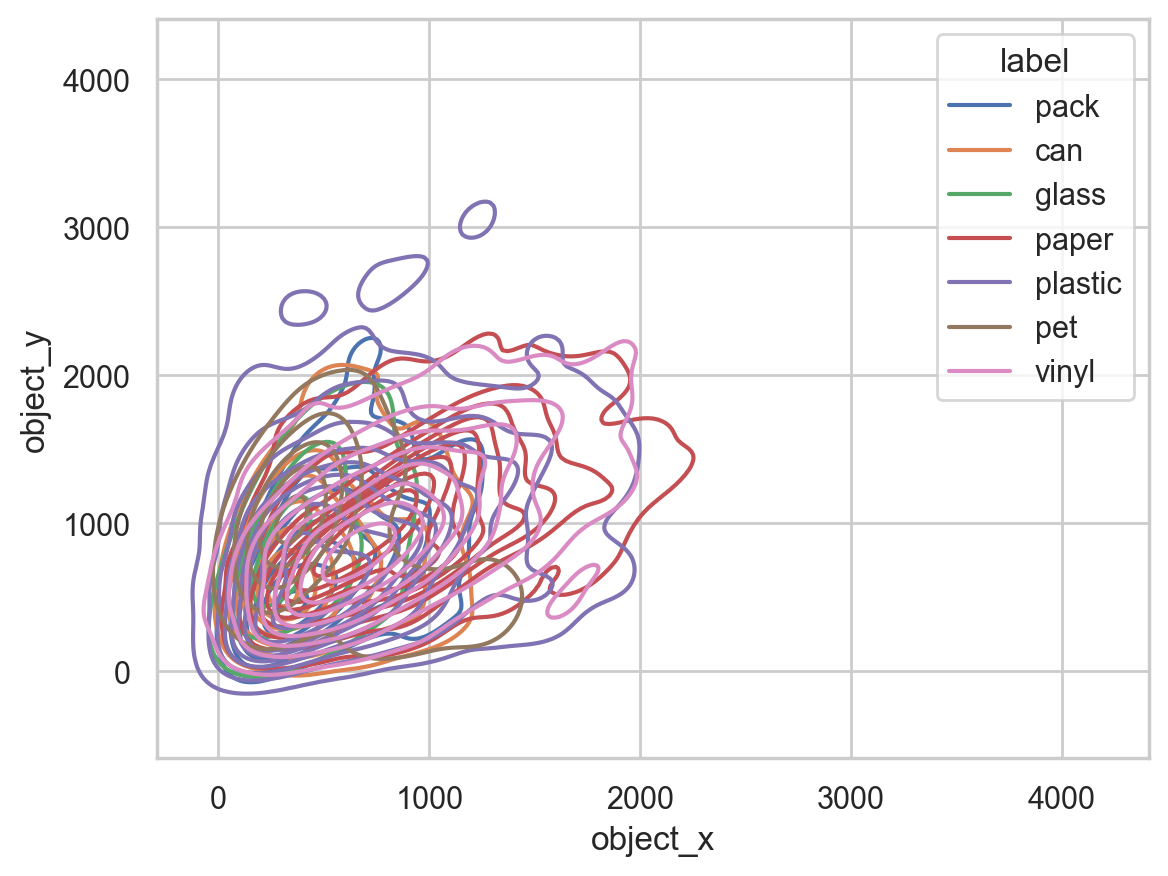

In [99]:
sns.kdeplot(data=df, x='object_x', y="object_y", hue="label"); # 클래스 별 객체의 가로, 세로길이 분포    

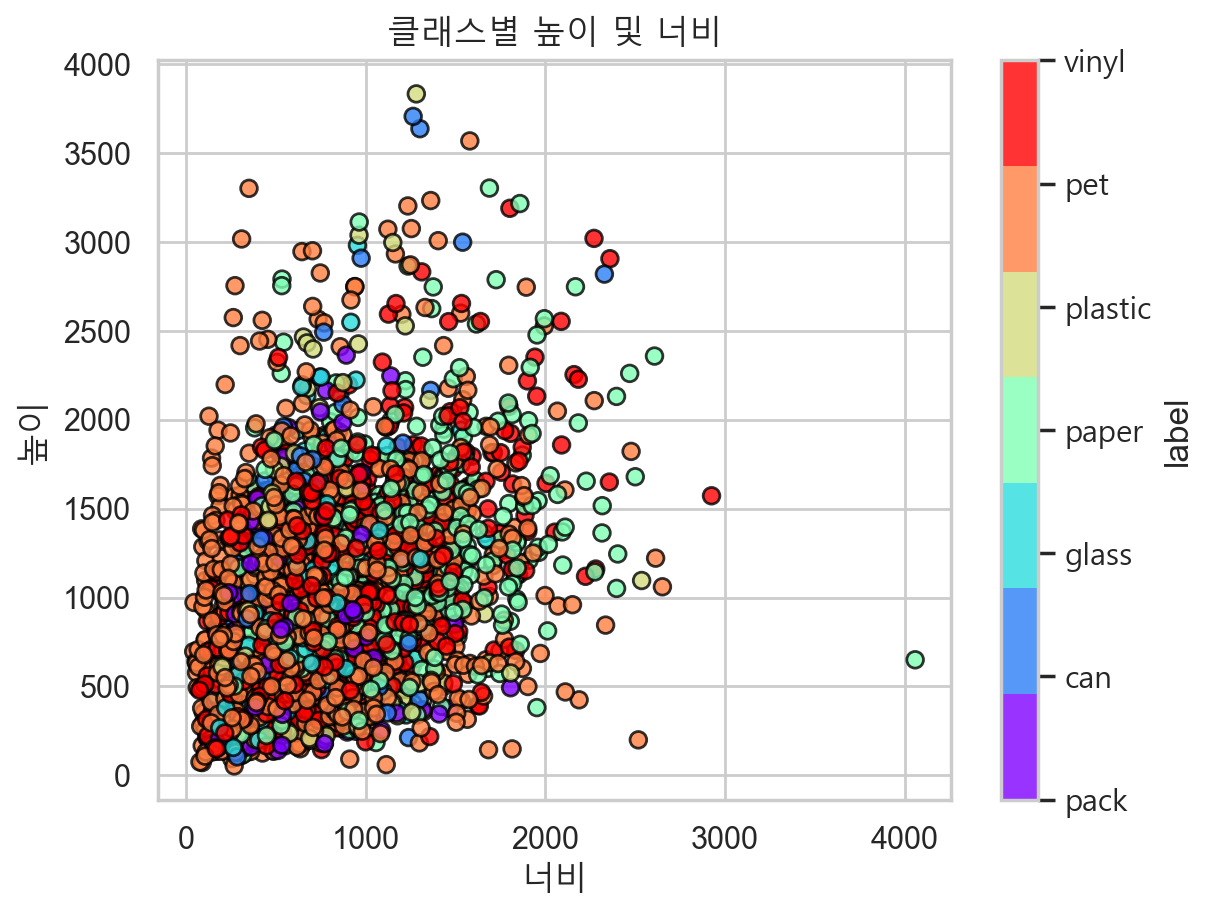

In [100]:
plt.scatter(df['object_x'], df['object_y'],alpha=0.8,edgecolors='black', c=df['label'].astype('category').cat.codes, cmap=plt.cm.get_cmap('rainbow', len(df['label'].unique())))
plt.title('클래스별 높이 및 너비', fontname ='malgun gothic')
plt.xlabel('너비', fontname ='malgun gothic')
plt.ylabel('높이', fontname ='malgun gothic')
cb=plt.colorbar(ticks=range(7), label='label')
cb.set_ticklabels(['pack', 'can', 'glass', 'paper', 'plastic', 'pet', 'vinyl'], fontname ='malgun gothic')
plt.show()

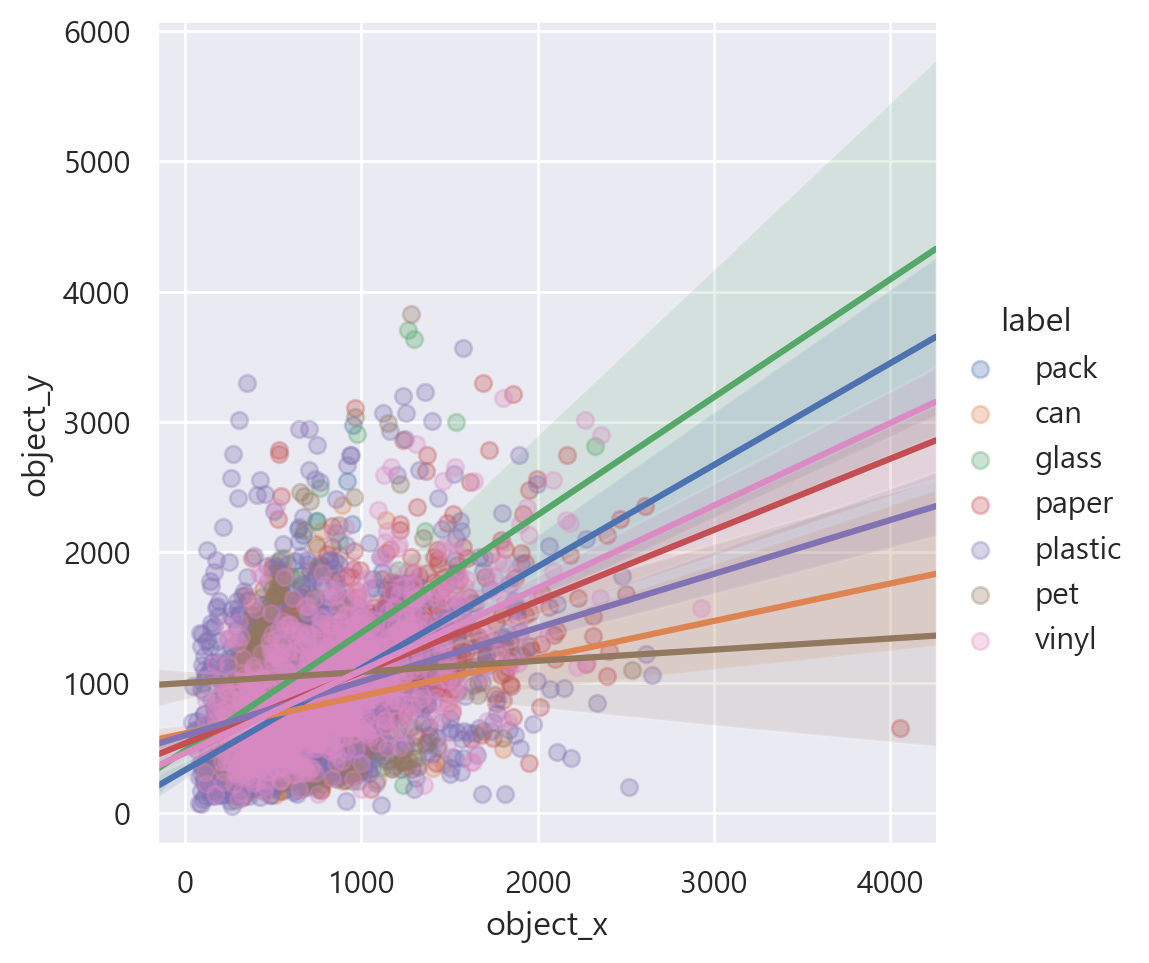

In [101]:
sns.set(font="malgun gothic") # 선형관계 확인 : 특별한 건 없다
sns.lmplot(x='object_x', y='object_y', hue = 'label', data = df, scatter_kws = {'alpha': 0.3}, truncate=False)
plt.show()

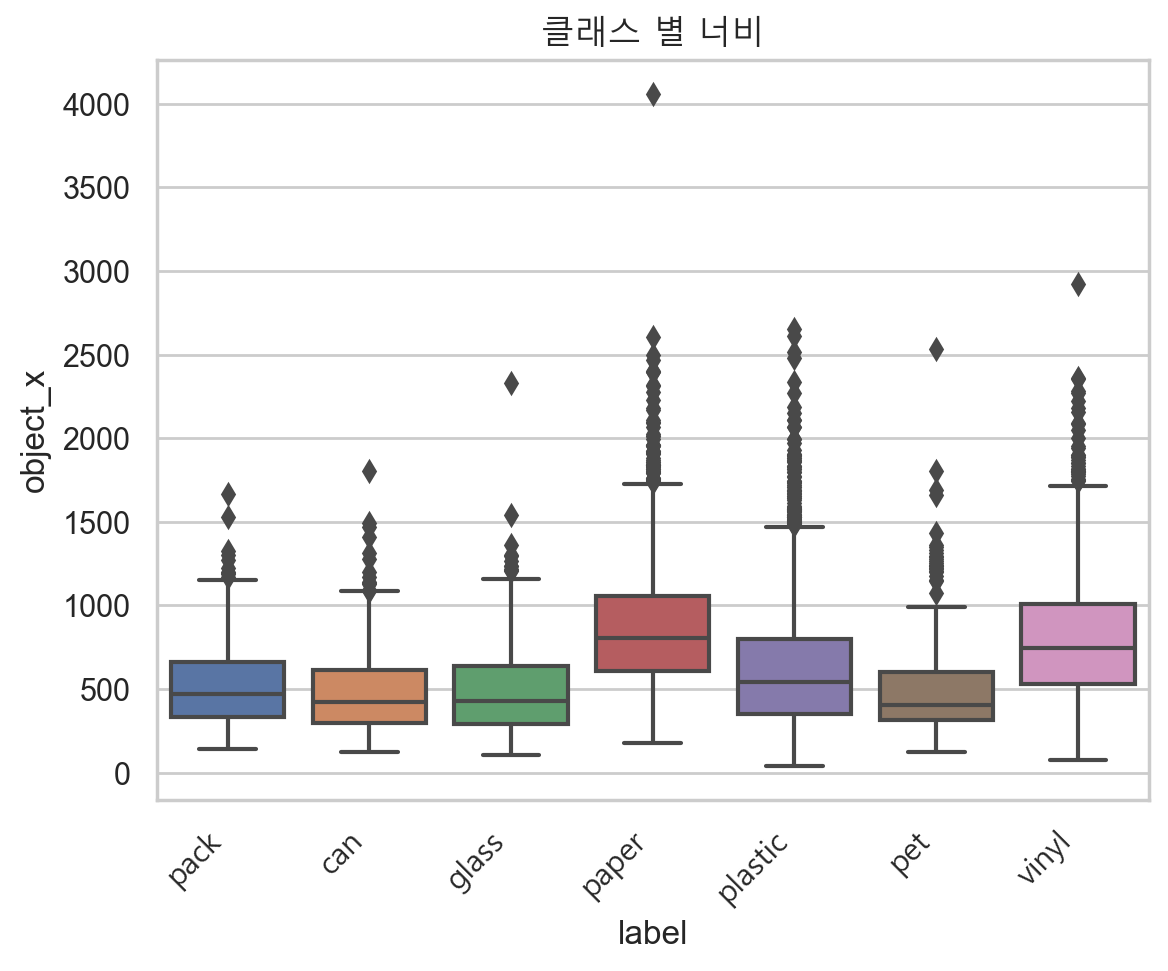

In [102]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 너비', fontname ='malgun gothic')
sns.boxplot(x="label", y=df['object_x'], data=df);

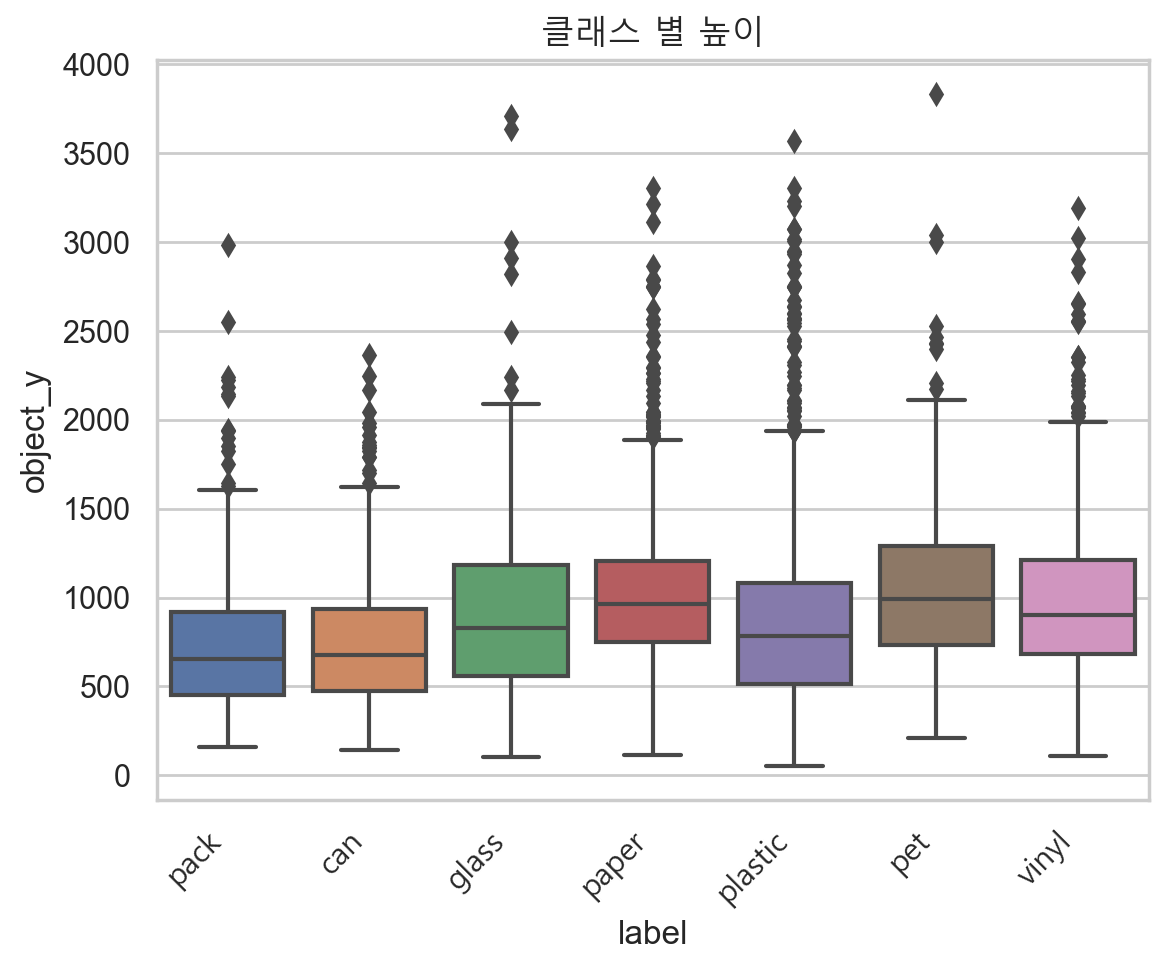

In [103]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 높이', fontname ='malgun gothic')
sns.boxplot(x="label", y=df['object_y'], data=df);

In [104]:
df[df['object_x'] > 4000 ]

,file_name,size_x,size_y,label,x1,y1,x2,y2,object_x,object_y
4946,3666847.jpg,5312,2988,paper,543.0,1030.727273,4602.090909,1680.727273,4059.090909,650.0


In [112]:
img = cv2.imread('./data/data_star/3666847.jpg', cv2.IMREAD_COLOR)

# 사각형 그리기
img = cv2.rectangle(img, (26, 88), (221, 143), (255, 0, 0), 2)
 
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
df[df['object_y'] > 3800 ]

,file_name,size_x,size_y,label,x1,y1,x2,y2,object_x,object_y
5746,3706844.jpg,2988,5312,pet,901.769231,501.153846,2182.538462,4331.923077,1280.769231,3830.769231


In [107]:
img = cv2.imread('./data/data_star/3706844.jpg', cv2.IMREAD_COLOR)

# 사각형 그리기
img = cv2.rectangle(img, (77, 24), (186, 208), (255, 0, 0), 2)
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
df['x'] = (df['x2']+df['x1'])/df['size_x'] # yolo용 좌표 x
df['y'] = (df['y2']+df['y1'])/df['size_y'] # yolo용 좌표 y
df['box_x'] = (df['x2']-df['x1'])/df['size_x'] # yolo용 좌표 x
df['box_y'] = (df['y2']-df['y1'])/df['size_y'] # yolo용 좌표 y

drop_list = ['size_x','size_y','x1','x2','y1','y2','object_x','object_y']
df = df.drop(drop_list,axis=1)
df

,file_name,label,x,y,box_x,box_y
0,3403540.jpg,pack,0.957004,0.983594,0.141470,0.149219
1,3403658.jpg,can,1.009708,0.973438,0.130374,0.129688
2,3403788.jpg,glass,1.018649,0.949352,0.306951,0.093643
3,3403841.jpg,paper,1.047222,1.012500,0.288889,0.187500
4,3403871.jpg,paper,1.038213,1.023810,0.278660,0.188823
...,...,...,...,...,...,...
5870,3718233.jpg,paper,0.977344,1.069444,0.516406,0.402778
5871,3718307.jpg,paper,0.942968,0.991666,0.582031,0.536111
5872,3718450.jpg,paper,0.982812,1.056837,0.454688,0.534616
5873,3718566.jpg,vinyl,1.236841,0.962915,0.547737,0.210174


In [109]:
dic = {'vinyl': '4','glass': '6', 'paper': '10', 'pack': '10', 'can': '11', 'pet': '12', 'plastic': '13'}

df['label'] = df['label'].apply(lambda x : x.replace(x, dic[x]))
df['label'] = df['label'].astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  5875 non-null   object 
 1   label      5875 non-null   int32  
 2   x          5875 non-null   float64
 3   y          5875 non-null   float64
 4   box_x      5875 non-null   float64
 5   box_y      5875 non-null   float64
dtypes: float64(4), int32(1), object(1)
memory usage: 252.6+ KB


In [111]:
df.to_csv('./data/df_star_eda.csv', header=True, index=False,encoding='ms949')